In [1]:
#Revised September 2019 - remove plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#from mpl_toolkits.basemap import Basemap
import datetime
from scipy import signal

import matplotlib.dates as mdates

In [2]:
%matplotlib inline
plt.ion()

In [3]:
#full list
log_files=[['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97intvl.csv','Initial power check']]


In [4]:
for log_file,description in log_files:   #print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'])
    #sub_range=list(range(3,df.shape[0])) #getting number of entries?  could go less
        #print(type(df))
    #overview(df,log_file + ' * ' + description)
    #OAT(df,log_file + ' * ' + description)
    #fuel(df,log_file + ' * ' + description)
    #airspeed(df,log_file + ' * ' + description)
    
    

In [5]:
df.tail()



,Date,Time,Status,Umax1,Umax2,Umax3,Umin1,Umin2,Umin3,MaxFreq,...,AvePFsum,AveUunb,AveUthd1,AveUthd2,AveUthd3,WP+,WP-,WQ_LAG,WQ_LEAD,Unnamed: 109
454,2020/01/22,2020-02-28 09:20:17,0,233.4,232.1,231.7,233.3,232.0,231.6,50.00,...,-0.318,0.3E00,2.2E00,2.1E00,2.0E00,38.0,0.0,0.0,149.0,NaN
455,2020/01/22,2020-02-28 09:20:18,0,233.4,232.2,231.7,233.3,232.0,231.6,50.00,...,-0.318,0.3E00,2.2E00,2.1E00,2.0E00,38.0,0.0,0.0,149.0,NaN
456,2020/01/22,2020-02-28 09:20:19,0,233.4,232.2,231.7,233.3,232.0,231.6,50.00,...,-0.318,0.3E00,2.2E00,2.1E00,2.0E00,38.0,0.0,0.0,150.0,NaN
457,2020/01/22,2020-02-28 09:20:20,0,233.3,232.0,232.4,232.5,231.5,231.7,50.01,...,-0.023,0.3E00,2.2E00,2.1E00,2.1E00,38.0,0.0,0.0,150.0,NaN
458,2020/01/22,2020-02-28 09:20:21,0,233.1,232.1,232.5,233.0,231.9,232.4,50.00,...,-0.019,0.3E00,2.2E00,2.1E00,2.1E00,38.0,0.0,0.0,151.0,NaN


In [6]:
df.columns


Index(['Date', 'Time', 'Status', 'Umax1', 'Umax2', 'Umax3', 'Umin1', 'Umin2',
       'Umin3', 'MaxFreq',
       ...
       'AvePFsum', 'AveUunb', 'AveUthd1', 'AveUthd2', 'AveUthd3', 'WP+', 'WP-',
       'WQ_LAG', 'WQ_LEAD', 'Unnamed: 109'],
      dtype='object', length=110)

In [7]:
timestamps=(df['Time'])

In [8]:
type(timestamps[0])


pandas._libs.tslib.Timestamp

Check timestamps step size to see if data average/interval was changed.

In [9]:
timestamps

0     2020-02-28 09:12:43
1     2020-02-28 09:12:44
2     2020-02-28 09:12:45
3     2020-02-28 09:12:46
4     2020-02-28 09:12:47
5     2020-02-28 09:12:48
6     2020-02-28 09:12:49
7     2020-02-28 09:12:50
8     2020-02-28 09:12:51
9     2020-02-28 09:12:52
10    2020-02-28 09:12:53
11    2020-02-28 09:12:54
12    2020-02-28 09:12:55
13    2020-02-28 09:12:56
14    2020-02-28 09:12:57
15    2020-02-28 09:12:58
16    2020-02-28 09:12:59
17    2020-02-28 09:13:00
18    2020-02-28 09:13:01
19    2020-02-28 09:13:02
20    2020-02-28 09:13:03
21    2020-02-28 09:13:04
22    2020-02-28 09:13:05
23    2020-02-28 09:13:06
24    2020-02-28 09:13:07
25    2020-02-28 09:13:08
26    2020-02-28 09:13:09
27    2020-02-28 09:13:10
28    2020-02-28 09:13:11
29    2020-02-28 09:13:12
              ...        
429   2020-02-28 09:19:52
430   2020-02-28 09:19:53
431   2020-02-28 09:19:54
432   2020-02-28 09:19:55
433   2020-02-28 09:19:56
434   2020-02-28 09:19:57
435   2020-02-28 09:19:58
436   2020-0

In [10]:
#1 - Instantaneous Inrush [VA]
#line to neutral voltage
maxurms1=np.asarray( df['MaxUrms1'] ).astype(float)
maxurms2=np.asarray( df['MaxUrms2'] ).astype(float)
maxurms3=np.asarray( df['MaxUrms3'] ).astype(float)
maxirms1=np.asarray( df['MaxIrms1'] ).astype(float)
maxirms2=np.asarray( df['MaxIrms2'] ).astype(float)
maxirms3=np.asarray( df['MaxIrms3'] ).astype(float)

maxs1=maxurms1*maxirms1
maxs2=maxurms2*maxirms2
maxs3=maxurms2*maxirms3

#Average P Q S power
maxpsum=np.asarray( df['MaxPsum'] ).astype(float) #active?
maxqsum=np.asarray( df['MaxQsum'] ).astype(float) #reactive?
maxssum=np.asarray( df['MaxSsum'] ).astype(float) #total?

#2 - Short term < 5s [W]
#3 - Long term > 5s [W]

#average PF sum
avepfsum=np.asarray( df['AvePFsum'] ).astype(float)

#frequency 
minfreq=np.asarray( df['MinFreq'] ).astype(float)
avefreq=np.asarray( df['AveFreq'] ).astype(float)
maxfreq=np.asarray( df['MaxFreq'] ).astype(float)

#average  rms line currents?
aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
aveirms4=np.asarray( df['AveIrms4'] ).astype(float)

#Average P Q S power
avepsum=np.asarray( df['AvePsum'] ).astype(float) #active?
aveqsum=np.asarray( df['AveQsum'] ).astype(float) #reactive?
avessum=np.asarray( df['AveSsum'] ).astype(float) #total?


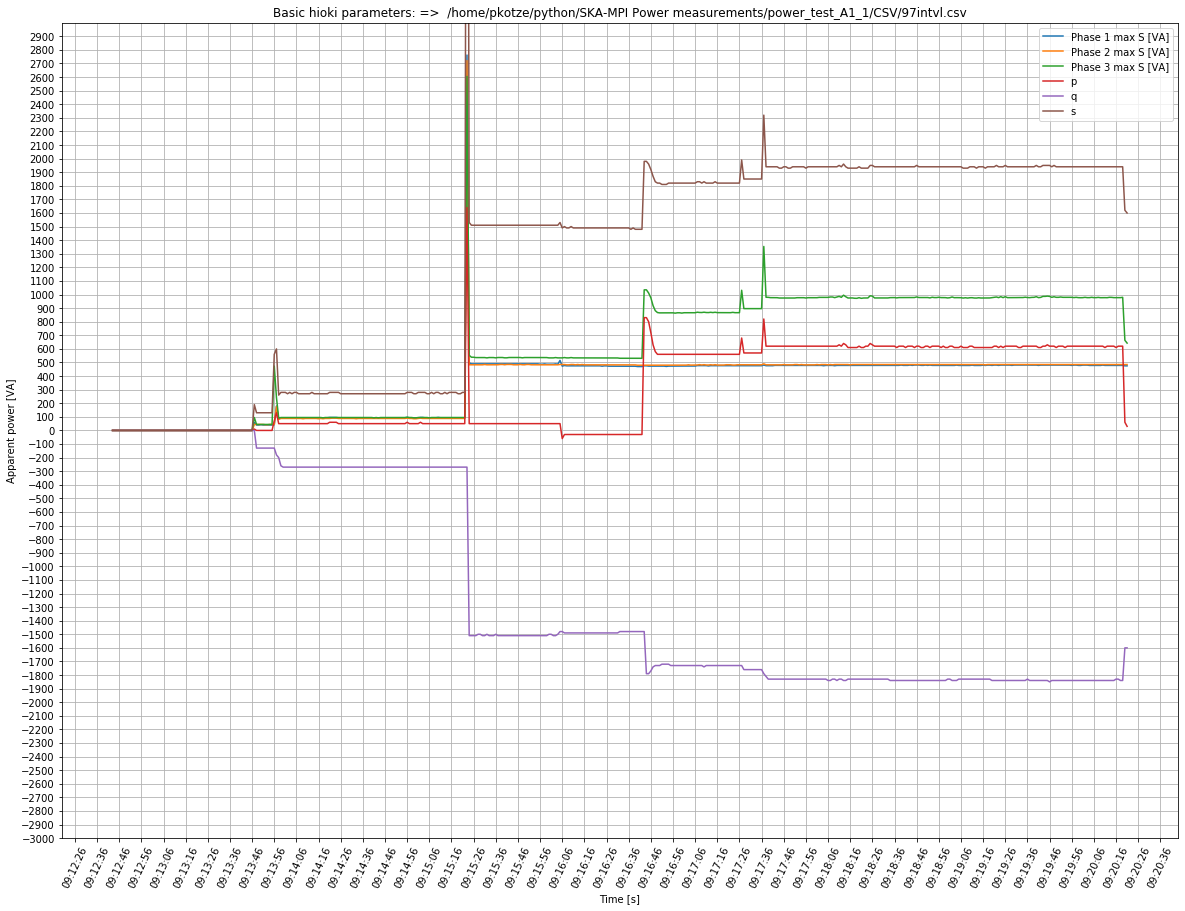

In [11]:

#Plot calculated peak 
fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Apparent power [VA]', 
xlabel='Time [s]')
ax.plot(timestamps,maxs1)
ax.plot(timestamps,maxs2)
ax.plot(timestamps,maxs3)
ax.plot(timestamps,maxpsum)
ax.plot(timestamps,maxqsum)
ax.plot(timestamps,maxssum)

ymin=-3000
ymax=3000
ystep=100
plt.yticks(range(ymin,ymax,ystep))
plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['Phase 1 max S [VA]','Phase 2 max S [VA]','Phase 3 max S [VA]','p','q','s'])
ax.grid()


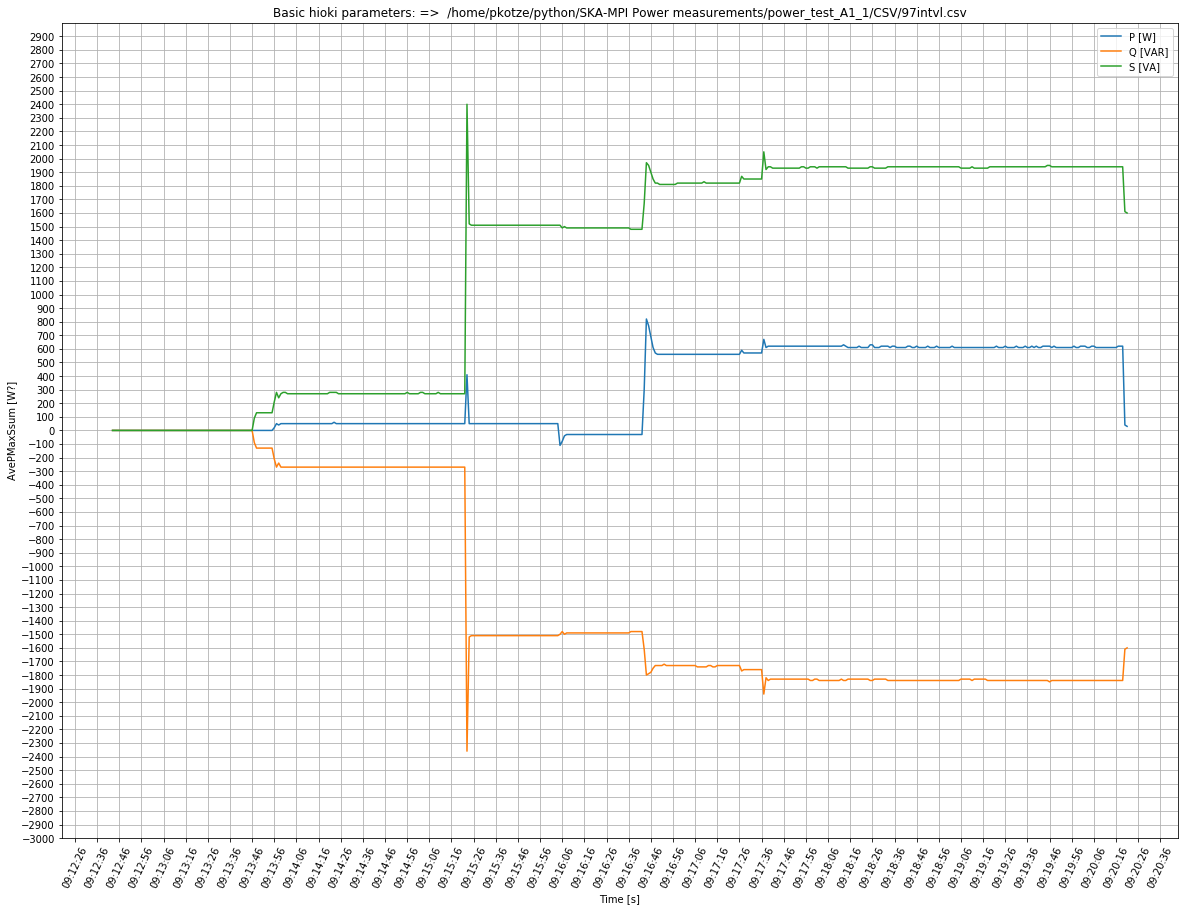

In [12]:

#Plot Basic P Q S power parameters

fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,avepsum)
ax.plot(timestamps,aveqsum)
ax.plot(timestamps,avessum)


ymin=-3000
ymax=3000
ystep=100
plt.yticks(range(ymin,ymax,ystep))
plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['P [W]','Q [VAR]','S [VA]'])
ax.grid()


In [13]:
#line to neutral voltage
aveirms1=np.asarray( df['AveUrms1'] ).astype(float)
aveirms2=np.asarray( df['AveUrms2'] ).astype(float)
aveirms3=np.asarray( df['AveUrms3'] ).astype(float)

#average PF sum
avepfsum=np.asarray( df['AvePFsum'] ).astype(float)

#frequency 
minfreq=np.asarray( df['MinFreq'] ).astype(float)
avefreq=np.asarray( df['AveFreq'] ).astype(float)
maxfreq=np.asarray( df['MaxFreq'] ).astype(float)

#average  rms line currents?
aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
aveirms4=np.asarray( df['AveIrms4'] ).astype(float)

#Average P Q S power
avepsum=np.asarray( df['AvePsum'] ).astype(float) #active?
aveqsum=np.asarray( df['AveQsum'] ).astype(float) #reactive?
avessum=np.asarray( df['AveSsum'] ).astype(float) #total?


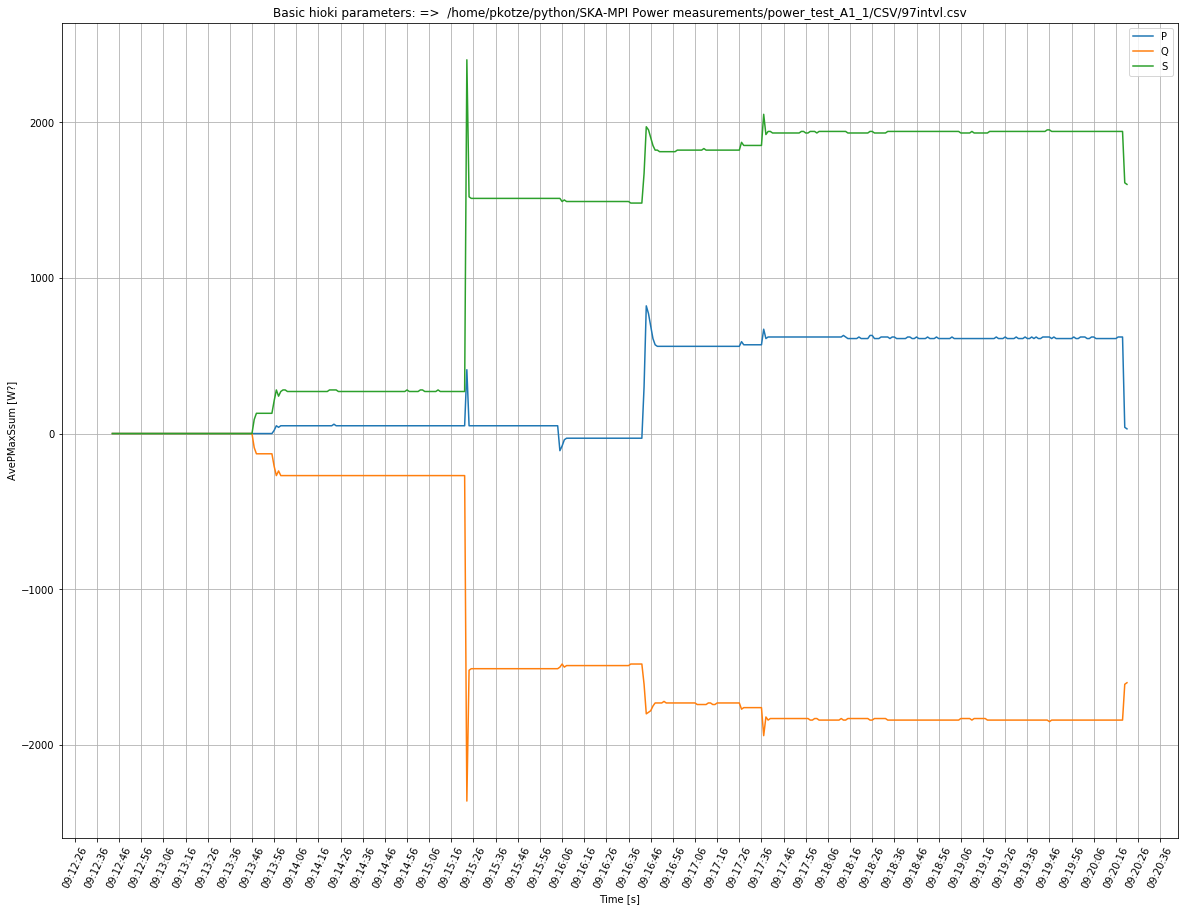

In [14]:


fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,avepsum)
ax.plot(timestamps,aveqsum)
ax.plot(timestamps,avessum)


ymin=0
ymax=3000
ystep=100
#plt.yticks(range(ymin,ymax,ystep))
#plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['P','Q','S'])
ax.grid()


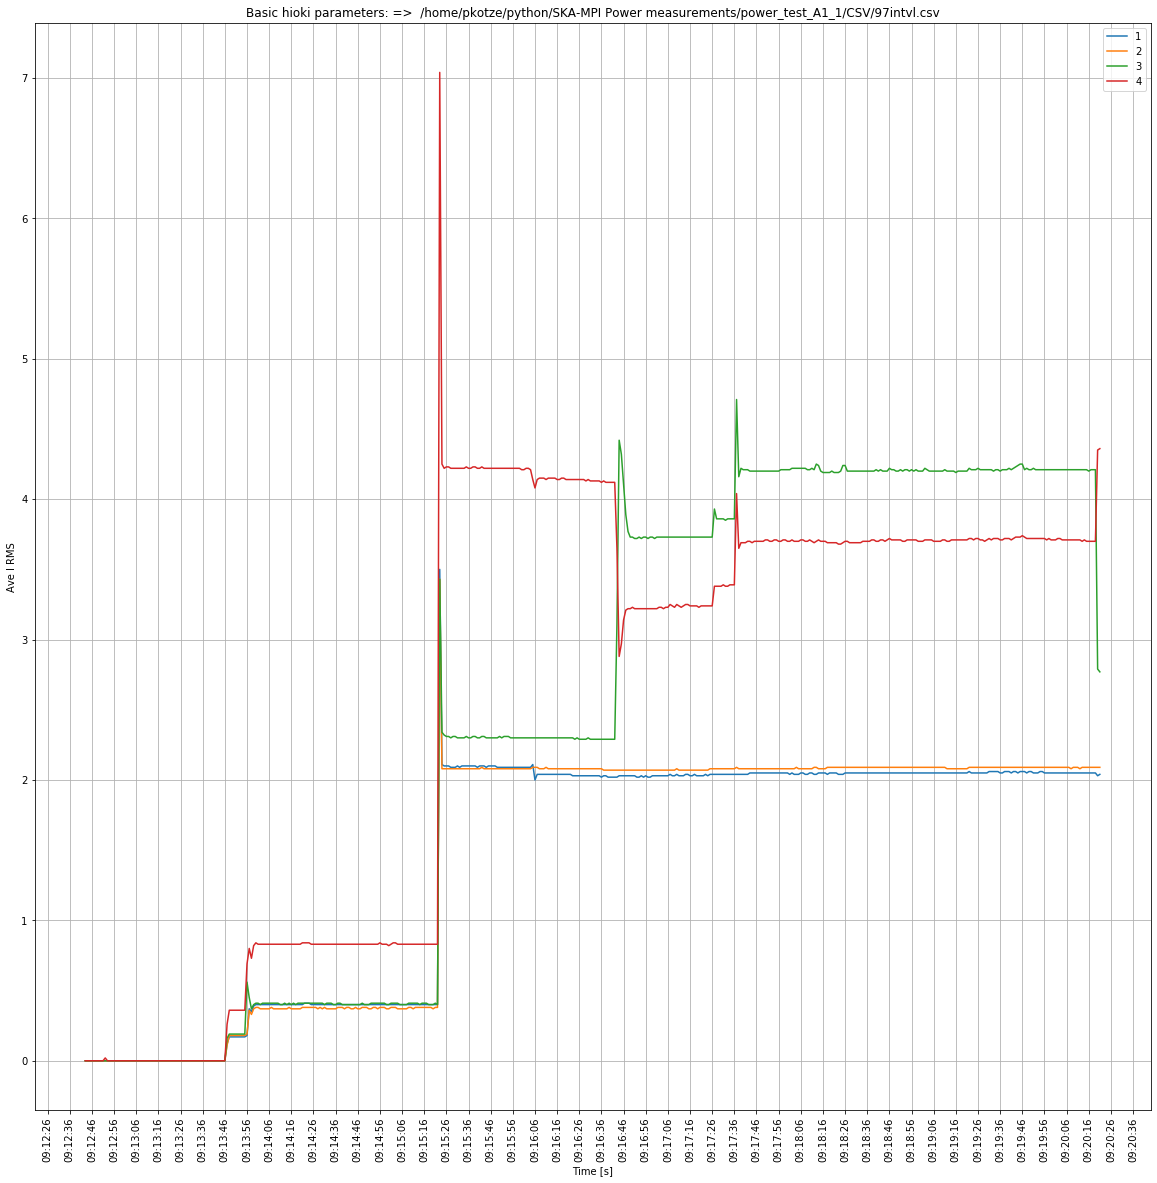

In [15]:
#Plot Basic engine parameters

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Ave I RMS', 
xlabel='Time [s]')
ax.plot(timestamps,aveirms1)
ax.plot(timestamps,aveirms2)
ax.plot(timestamps,aveirms3)
ax.plot(timestamps,aveirms4)

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=90)
ax.legend(['1','2','3','4'])
ax.grid()


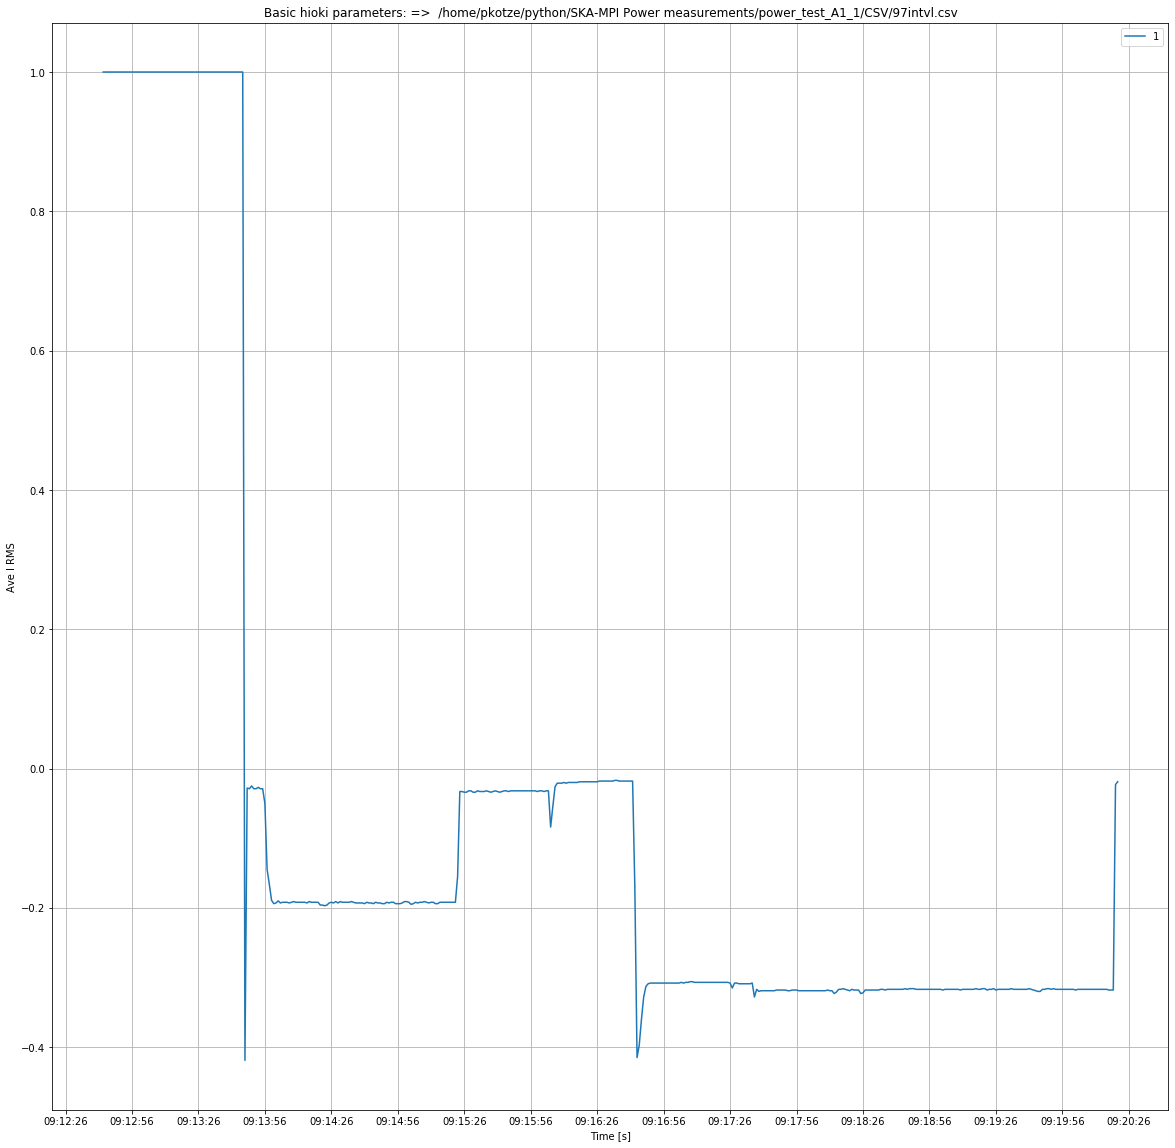

In [16]:
#Plot Basic engine parameters

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Ave I RMS', 
xlabel='Time [s]')
ax.plot(timestamps,avepfsum)

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 

ax.legend(['1','2','3','4'])
ax.grid()

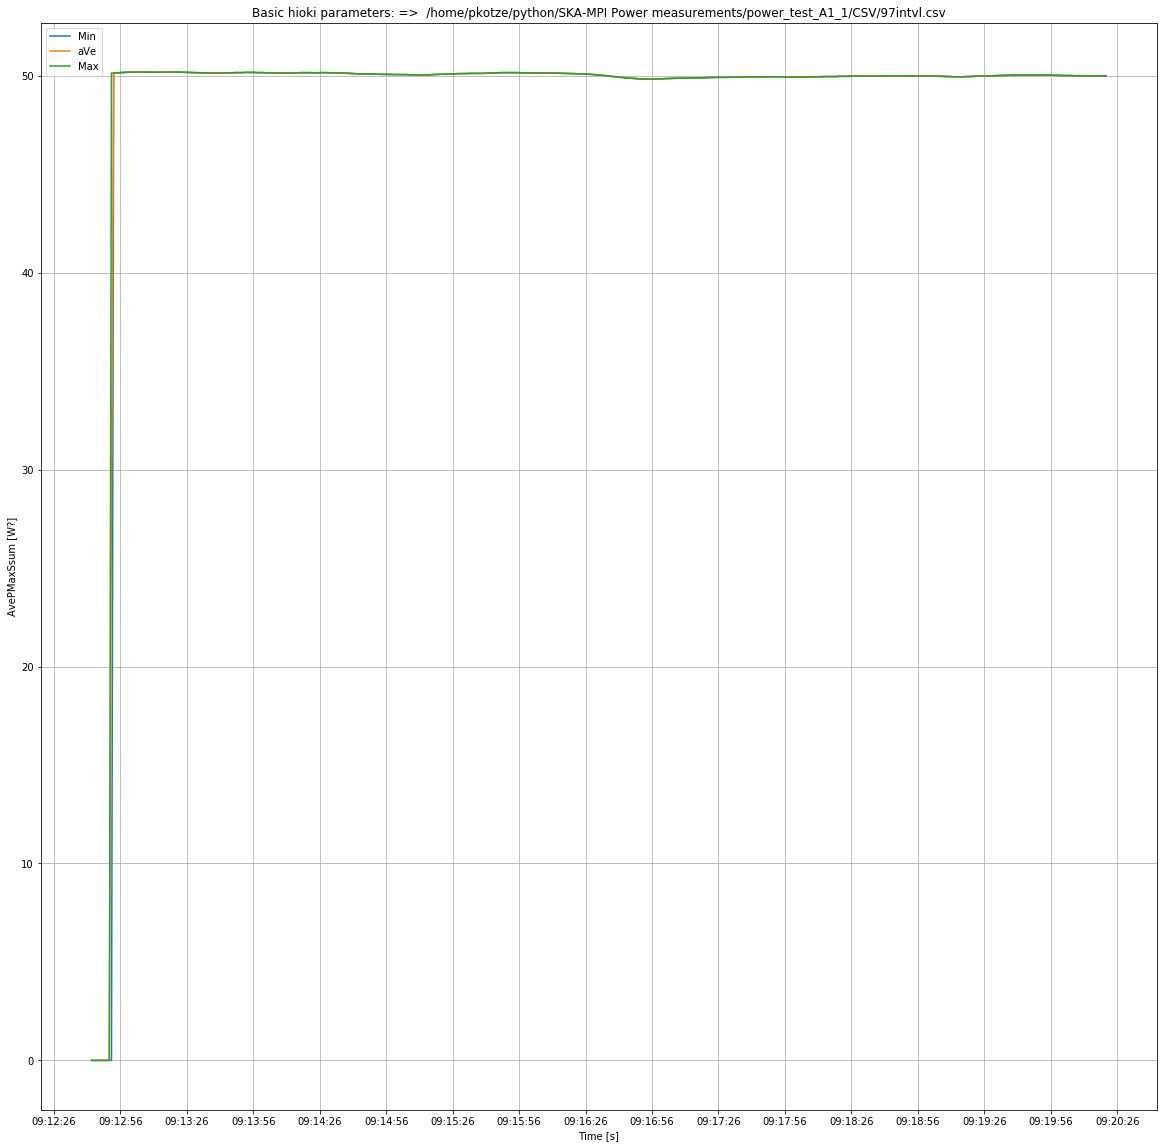

In [17]:

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,minfreq)
ax.plot(timestamps,avefreq)
ax.plot(timestamps,maxfreq)


ymin=0
ymax=3000
ystep=100
#plt.yticks(range(ymin,ymax,ystep))
#plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
ax.legend(['Min','aVe','Max'])
ax.grid()
